In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
import math

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [10, 8]

In [161]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 25

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 25 # n = 25 so we get delta x = delta y = 1

rhoa = 1 / L**2 # maybe (L-1)**2 due to boundary
rhob = 1 / 5**2 # Rho b
rhoc = 1 / 1**2

# The grid spacing is L/n

# The number of iterations
nsteps = 100

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

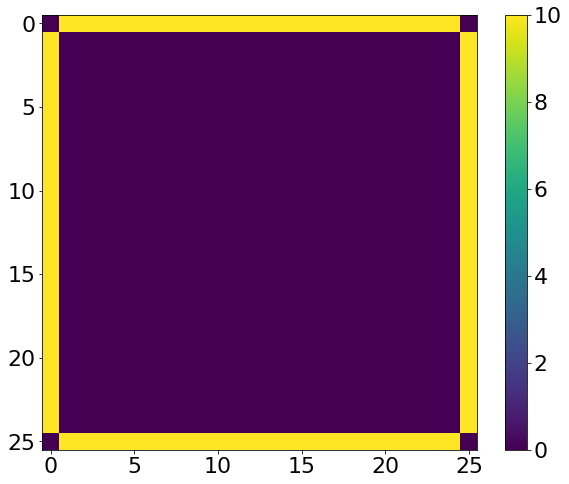

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

In [163]:
# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25 + 0.25*(L/n)*(L/n)*2*math.pi*rhoa

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def relax2(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25 + (0.25*(L/n)*(L/n)*2*math.pi*rhob if (n//2 - 2.5 < x < n//2 + 2.5) and (n//2 - 2.5 < y < n//2 + 2.5) else 0) # 0.25*(L/n)*(L/n)*2*math.pi*rhob

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def relax3(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25 + (0.25*(L/n)*(L/n)*2*math.pi*rhoc if (n//2 - 1 < x < n//2 + 1) and (n//2 - 1 < y < n//2 + 1) else 0) # 0.25*(L/n)*(L/n)*2*math.pi*rhoc

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def update(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax(n, v, checker)

    im.set_array(v)
    return im,

def update2(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax2(n, v, checker)

    im.set_array(v)
    return im,

def update3(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax3(n, v, checker)

    im.set_array(v)
    return im,

In [105]:
# we generate nsteps+1 frames, because frame=0 is skipped (see above)
# a)
reset()
anim = animation.FuncAnimation(fig, update, frames=nsteps+1, interval=200, blit=True, repeat=False)
anim

In [106]:
# b)
reset()
anim = animation.FuncAnimation(fig, update2, frames=nsteps+1, interval=200, blit=True, repeat=False)
anim

In [164]:
# c) 
reset()
anim = animation.FuncAnimation(fig, update3, frames=nsteps+1, interval=200, blit=True, repeat=False)
anim


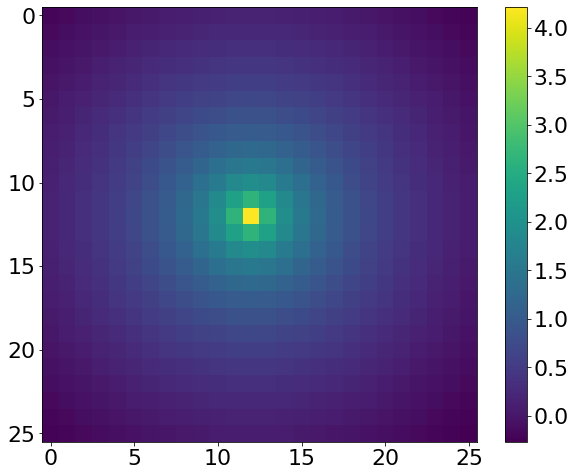

In [233]:
def chrg(x,y):
    return 4.215 if (x-n//2 == 0 and y-n//2 == 0) else 2.646-(np.log(np.sqrt((x-n//2)**2 + (y-n//2)**2)))

vpoint = v.copy()
for x in range(n+1):
    for y in range(n+1):
        vpoint[x][y] = chrg(x,y)


fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
im2 = ax2.imshow(vpoint, cmap=None, interpolation='nearest')
fig2.colorbar(im2, ax=ax2)
fig2.patch.set_facecolor('xkcd:white')

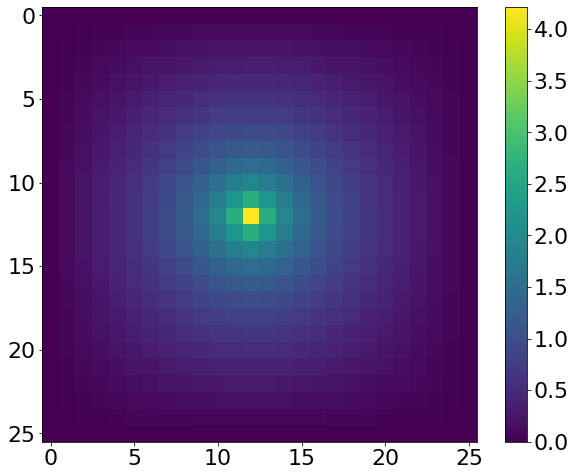

In [229]:
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
#reset()
for i in range(2000):
    update3(i)

vsim = v.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(vsim, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

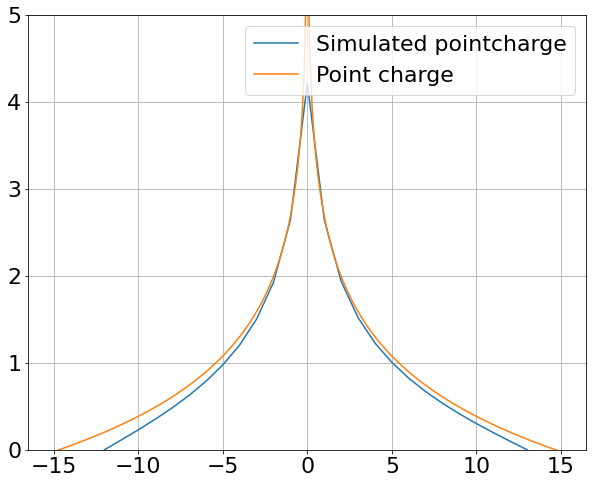

In [269]:
_r = np.arange(0,n+1) - n//2
_rpoint = np.linspace(-15, 15, 500)
_point = vpoint[:,n//2].copy()
_vsim = vsim[:,n//2]

_point = np.array([2.687-(np.log(abs(r))) if r != 0 else 10**6 for r in _rpoint])

plt.plot(_r, _vsim, label="Simulated pointcharge")
plt.plot(_rpoint, _point, label="Point charge")
plt.ylim(0, 5)
plt.grid()
plt.legend()